In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

We will continue to work with the fuel economy dataset in this workspace.

In [5]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

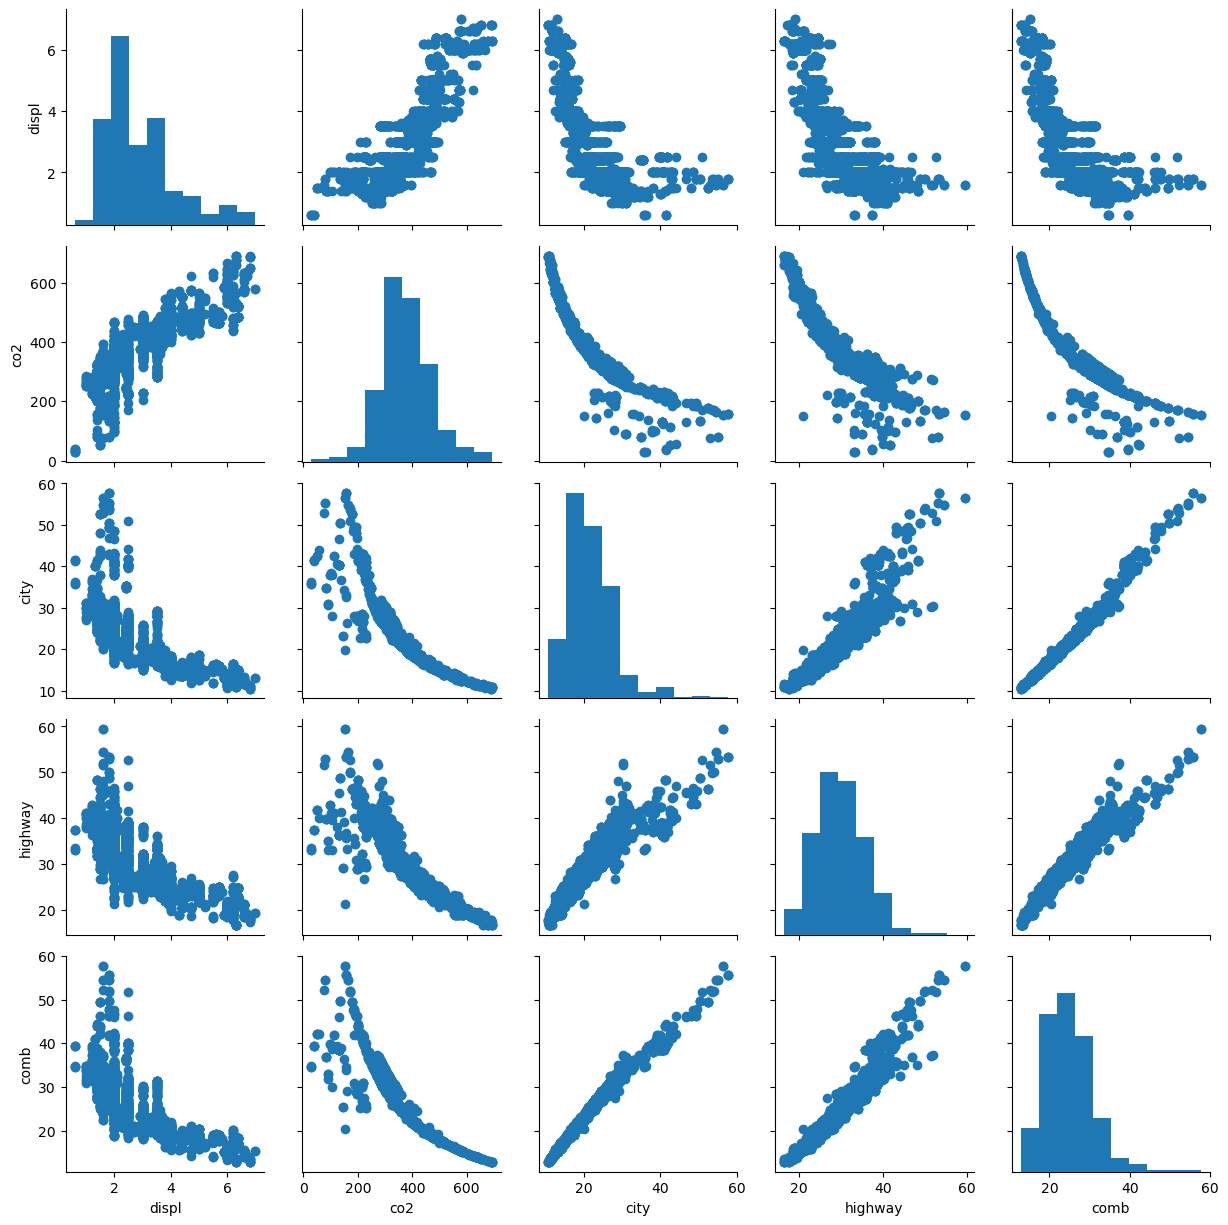

In [10]:
vals = ['displ', 'co2', 'city', 'highway', 'comb']
g=sb.PairGrid(data = fuel_econ, vars = vals)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

plt.xlabel

**Task 2**: The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

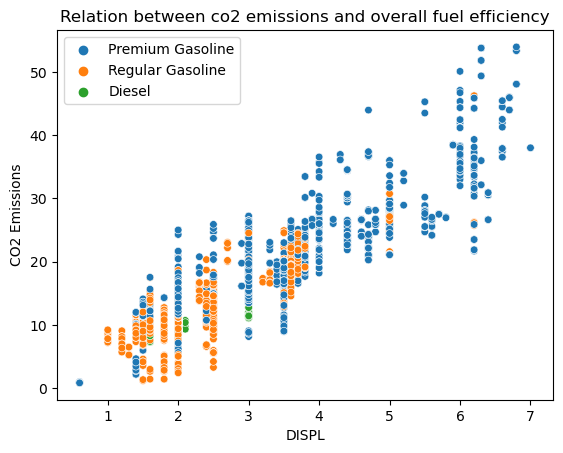

In [26]:
fuel_econ['co2_emission'] = fuel_econ['co2'] / fuel_econ['comb']

fuel_type = fuel_econ[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]

sb.scatterplot(data=fuel_type, x='displ', y='co2_emission', hue='fuelType', s = 30)

plt.xlabel('DISPL')
plt.ylabel('CO2 Emissions')
plt.title('Relation between co2 emissions and overall fuel efficiency')
plt.legend()

plt.show()